## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
# !pip install -U fsds
from fsds.imports import *
pd.set_option('max_columns',0)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [4]:
%pwd

'/Users/jamesirving/Documents/GitHub/_MOD PROJECTS/FOR CLASS/070620FT/dsc-mod-2-project-v2-1-onl01-dtsc-ft-070620'

In [5]:
## Load Data
df = pd.read_csv('kc_house_data.csv',index_col='id')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [62]:
## Drop Columns I won't use
drop_cols = ['date','view']
df.drop(columns=drop_cols,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64

In [64]:
## Check Object Columns for Numbers
df.select_dtypes('O')

,sqft_basement
id,
7129300520,0.0
6414100192,400.0
5631500400,0.0
2487200875,910.0
1954400510,0.0
...,...
263000018,0.0
6600060120,0.0
1523300141,0.0


In [65]:
df['sqft_basement'].value_counts(normalize=True,dropna=False)

0.0      0.59
?        0.02
600.0    0.01
500.0    0.01
700.0    0.01
         ... 
243.0    0.00
861.0    0.00
1281.0   0.00
276.0    0.00
1024.0   0.00
Name: sqft_basement, Length: 304, dtype: float64

In [66]:
## Checking Rows that Contain Placeholder
df[df['sqft_basement'].isin(['?'])]#.describe()#.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
16000397,189000.00,2,1.00,1200,9850,1.00,0.00,4,7,1200,?,1921,0.00,98002,47.31,-122.21,1060,5095
7203220400,861990.00,5,2.75,3595,5639,2.00,0.00,3,9,3595,?,2014,0.00,98053,47.68,-122.02,3625,5639
1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,3450,?,2002,0.00,98010,47.34,-122.03,3350,39750
2525310310,272500.00,3,1.75,1540,12600,1.00,0.00,4,7,1160,?,1980,0.00,98038,47.36,-122.03,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226049565,504600.00,5,3.00,2360,5000,1.00,0.00,3,7,1390,?,2008,0.00,98103,47.69,-122.33,2180,5009
1760650900,337500.00,4,2.50,2330,4907,2.00,0.00,3,7,2330,?,2013,nan,98042,47.36,-122.08,2300,3836
6021503707,352500.00,2,2.50,980,1010,3.00,nan,3,8,980,?,2008,0.00,98117,47.68,-122.39,980,1023


In [67]:
## Replace ? with 0.0
df = df.replace({'?':'0.0'})
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
243.0         1
861.0         1
1281.0        1
276.0         1
1024.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [68]:
## Convert to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,285.72,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,827.76,439.82,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [69]:
## Inspect Number Cols
df.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007


In [70]:
## Save List of Cols to treat as categorical
cat_cols = ['zipcode']

In [71]:
# df.select_dtypes('number')

In [72]:
# with plt.style.context('seaborn-talk'):
# #     fig,ax = plt.subplots(figsize=(20,20))
#     sns.scatterplot(data=df,x='lat',y='long',hue='price',markers='.',palette='Greens')#,ax=ax)

price           0.00
bedrooms        0.00
bathrooms       0.00
sqft_living     0.00
sqft_lot        0.00
floors          0.00
waterfront      0.11
condition       0.00
grade           0.00
sqft_above      0.00
sqft_basement   0.00
yr_built        0.00
yr_renovated    0.18
zipcode         0.00
lat             0.00
long            0.00
sqft_living15   0.00
sqft_lot15      0.00
dtype: float64


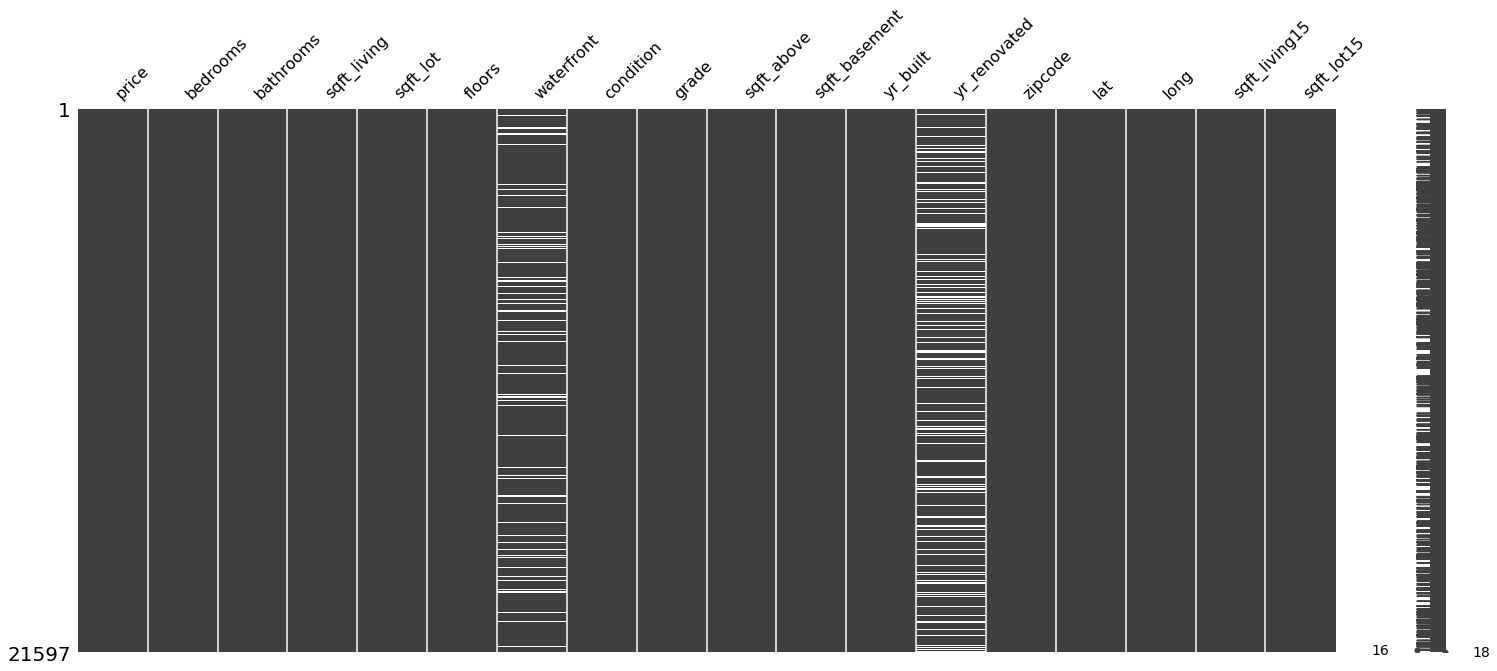

In [73]:
import plotly.express as px
import missingno as ms

null_counts = df.isna().sum()
print(null_counts/len(df))
ms.matrix(df)

# px.scatter(df.fillna(2),x='lat',y='long',color='waterfront',symbol='waterfront')

In [74]:
df['waterfront'].fillna(0,inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [75]:
target='price'
col = 'sqft_basement'

In [76]:
price_fmt = mpl.ticker.StrMethodFormatter("${x:,.2f}")

In [77]:
# from scipy import stats

# def normaltest(x):
#     tests = [['Test','stat','p','p<.05']]
    
#     tests.append( stats.no)

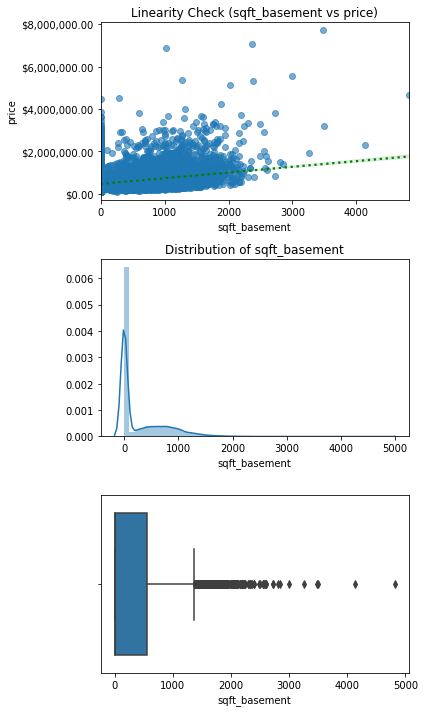

In [78]:
fig,axes = plt.subplots(figsize=(6,10),ncols=1,nrows=3)
axes = axes.flatten()
sns.regplot(col,target,df,ax=axes[0],scatter_kws=dict(alpha=0.6),
            line_kws={'color':'green', 'ls':':'})
axes[0].set_title(f"Linearity Check ({col} vs {target})")
axes[0].yaxis.set_major_formatter(price_fmt)

sns.distplot(df[col],ax=axes[1])
axes[1].set_title(f"Distribution of {col}")


# axes[2].set
sns.boxplot(x=col,data=df,ax=axes[2])
# axes[2].axis('off')

# pd.plotting.table(axes[2], )

plt.tight_layout()

In [79]:
import scipy.stats as stats

In [80]:
def is_outlier_z(data):
    """Returns True for values > 3 zscores away from the mean"""
    zscores = np.abs(stats.zscore(data))
    return zscores > 3

def is_outlier_iqr(data):
    """Returns True for values > that are > 1.5 * IQR cuttoff 
    IQR outlier cutoff = (75% - 25%) * 1.5 """
    res = data.describe()
    iqr = (res['75%'] - res['25%'])*1.5
    return np.abs(data.mean()-data) > (data.mean() + iqr)
    

In [81]:
# df_z = pd.DataFrame(stats.zscore(df,axis=0),columns=df.columns)#.sum()
# df_z.describe()

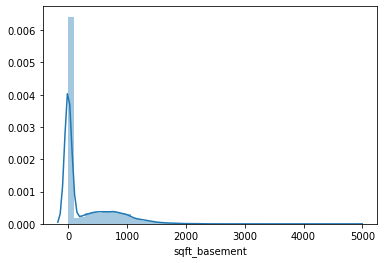

In [82]:
sns.distplot(df['sqft_basement'])

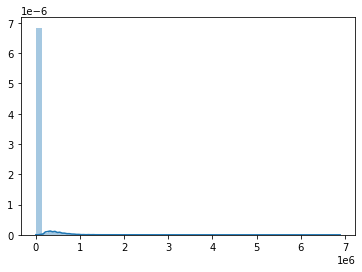

In [83]:
sns.distplot(df[~is_outlier_iqr(df['sqft_basement'])])

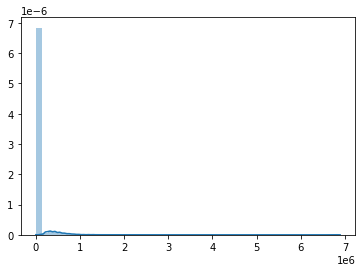

In [84]:
sns.distplot(df[~is_outlier_z(df['sqft_basement'])])

In [85]:
def plot_col_vs_target(df,col,target='price'):
    
    fig,axes = plt.subplots(figsize=(8,13),ncols=1,nrows=3)
    axes = axes.flatten()
    sns.regplot(col,target,df,ax=axes[0],scatter_kws=dict(alpha=0.6),
                line_kws={'color':'green', 'ls':':'})
    axes[0].set_title(f"Linearity Check ({col} vs {target})")
    axes[0].yaxis.set_major_formatter(price_fmt)

    sns.distplot(df[col],ax=axes[1])
    axes[1].set_title(f"Distribution of {col}")

    sns.boxplot(x=col,data=df,ax=axes[2])
    plt.tight_layout()
    return fig,axes

In [86]:

df.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007


In [87]:
from ipywidgets import interact

@interact
def show_col(col=list(df.columns)):
    plot_col_vs_target(df,col,target='price')

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

## Can I use FacetGrid and df or df_melt?

In [88]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,1530,0.00,2009,0.00,98103,47.70,-122.35,1530,1509
6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2310,0.00,2014,0.00,98146,47.51,-122.36,1830,7200
1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,1020,0.00,2009,0.00,98144,47.59,-122.30,1020,2007


In [89]:
# df_melt = pd.melt(df,id_vars=['price'])
# df_melt
df.T

id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,1736800520,9212900260,114101516,6054650070,1175000570,9297300055,1875500060,6865200140,16000397,7983200060,6300500875,2524049179,7137970340,8091400200,3814700200,1202000200,1794500383,3303700376,5101402488,1873100390,8562750320,2426039314,461000390,7589200193,7955080270,9547205180,9435300030,2768000400,7895500070,2078500320,...,8562790760,1931300090,9578500790,9253900271,3881900317,567000385,7011201004,7853420110,7853420110,3052700432,2025049203,952006823,3832050760,2767604724,6632300207,2767600688,7570050450,7430200100,4140940150,1931300412,8672200110,5087900040,1972201967,7502800100,191100405,8956200760,7202300110,249000205,5100403806,844000965,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
price,221900.00,538000.00,180000.00,604000.00,510000.00,1230000.00,257500.00,291850.00,229500.00,323000.00,662500.00,468000.00,310000.00,400000.00,530000.00,650000.00,395000.00,485000.00,189000.00,230000.00,385000.00,2000000.00,285000.00,252700.00,329000.00,233000.00,937000.00,667000.00,438000.00,719000.00,580500.00,280000.00,687500.00,535000.00,322500.00,696000.00,550000.00,640000.00,240000.00,605000.00,...,785000.00,610950.00,399950.00,3570000.00,579000.00,362500.00,645000.00,594866.00,625000.00,490000.00,399950.00,380000.00,270000.00,505000.00,385000.00,414500.00,347500.00,1220000.00,572000.00,475000.00,1090000.00,350000.00,520000.00,679950.00,1580000.00,541800.00,810000.00,1540000.00,467000.00,224000.00,507250.00,429000.00,610685.00,1010000.00,475000.00,360000.00,400000.00,402101.00,400000.00,325000.00
bedrooms,3.00,3.00,2.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,5.00,4.00,3.00,4.00,2.00,3.00,4.00,3.00,5.00,2.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,4.00,4.00,4.00,...,4.00,3.00,3.00,5.00,4.00,2.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,2.00,3.00,4.00,4.00,3.00,5.00,4.00,2.00,5.00,4.00,4.00,4.00,5.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,2.00
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50,2.25,1.50,1.00,2.50,2.50,1.00,1.00,1.75,2.00,3.00,2.00,1.00,1.00,1.00,1.75,2.75,2.50,1.50,2.25,2.00,1.75,1.00,1.75,2.50,2.50,1.50,1.75,1.00,2.75,2.50,1.00,2.00,1.00,2.50,...,3.50,3.00,2.50,4.50,3.25,1.50,3.25,3.00,3.00,2.25,1.00,2.50,2.50,2.50,2.50,1.50,2.50,3.50,2.75,2.25,3.75,2.75,2.25,2.75,3.25,2.50,3.00,3.75,2.50,1.75,2.50,2.00,2.50,3.50,2.50,2.50,2.50,0.75,2.50,0.75
sqft_living,1180.00,2570.00,770.00,1960.00,1680.00,5420.00,1715.00,1060.00,1780.00,1890.00,3560.00,1160.00,1430.00,1370.00,1810.00,2950.00,1890.00,1600.00,1200.00,1250.00,1620.00,3050.00,2270.00,1070.00,2450.00,1710.00,2450.00,1400.00,1520.00,2570.00,2320.00,1190.00,2330.00,1090.00,2060.00,2300.00,1660.00,2360.00,1220.00,2620.00,...,3070.00,1680.00,3087.00,4850.00,1900.00,940.00,1730.00,2780.00,2780.00,1500.00,710.00,1260.00,1870.00,1430.00,1520.00,1210.00,2540.00,4910.00,2770.00,1190.00,4170.00,2500.00,1530.00,3600.00,3410.00,3118.00,3990.00,4470.00,1425.00,1500.00,2270.00,1490.00,2520.00,3510.00,1310.00,1530.00,2310.00,1020.00,1600.00,1020.00
sqft_lot,5650.00,7242.00,10000.00,5000.00,8080.00,101930.00,6819.00,9711.00,7470.00,6560.00,9796.00,6000.00,19901.00,9680.00,4850.00,5000.00,14040.00,4300.00,9850.00,9774.00,4980.00,44867.00,6300.00,9643.00,6500.00,4697.00,2691.00,1581.00,6380.00,7173.00,3980.00,1265.00,5000.00,3000.00,6659.00,3060.00,34848.00,6000.00,8075.00,7553.00,...,4684.00,1570.00,5002.00,10584.00,2631.00,1768.00,1229.00,6000.00,6000.00,1290.00,1157.00,900.00,5000.00,1201.00,1488.00,1278.00,4760.00,9444.00,3852.00,1200.00,8142.00,5995.00,981.00,9437.00,10125.00,7866.00,7838.00,8088.00,1179.00,11968.00,5536.00,1126.00,6023.00,7200.00,1294.00,1131.00,5813.00,1350.00,2388.00,1076.00
floors,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.50,1.00,1.50,2.00,2.00,1.50,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.50,2.00,1.50,1.00,2.00,2.00,3.0

In [90]:
# g = sns.FacetGrid(df_melt,col='variable',col_wrap=4)
# g.map(sns.regplot,'variable','price')

In [91]:
# sns.lmplot()

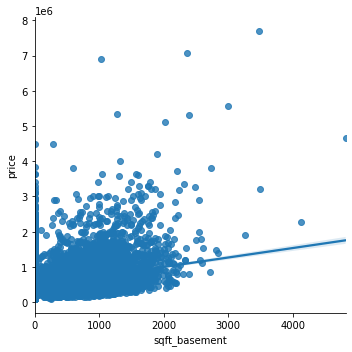

In [92]:
sns.lmplot('sqft_basement','price',df)

# Multicollinearity

In [93]:
fs.ihelp(fs.jmi.multiplot)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def multiplot(df,annot=True,fig_size=None):
    """EDA: Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    import seaborn as sns
    sns.set(style="white")
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt


    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    # Set up the matplotlib figure
    if fig_size==None:
        figsize=(16,16)
    else:
        figsize = fig_size

    f, ax = plt.subplots(figsize=(figsize))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=annot, cmap=cmap, center=0,

    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax

```

In [94]:
plt.colorbar?

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13c01a860>)

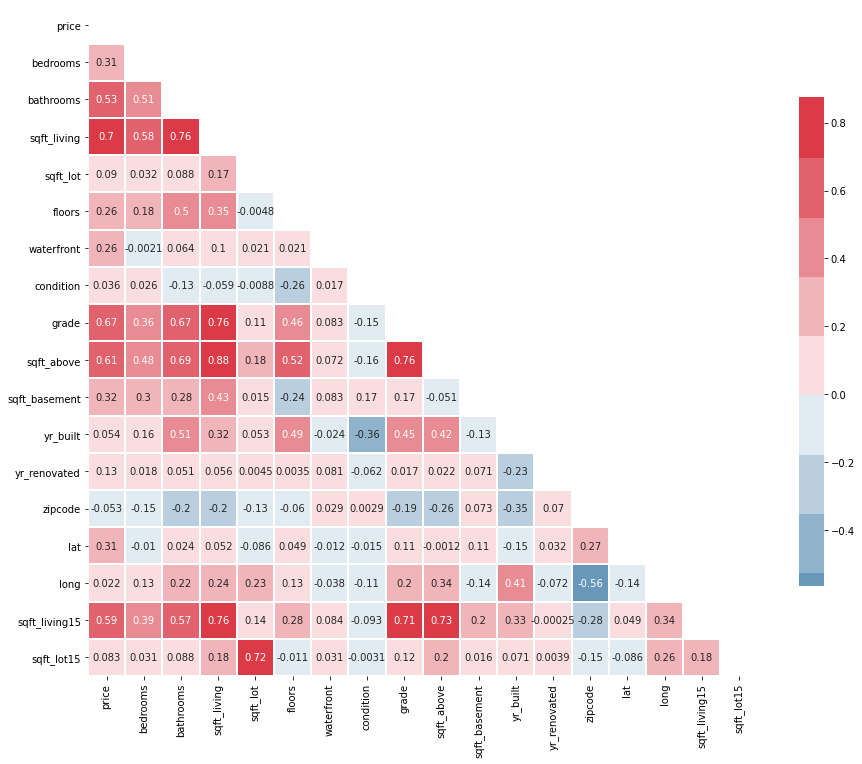

In [95]:
def plot_correlation(corr):

    fig,ax = plt.subplots(figsize=(15,15))
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask,k=0)] = True
    sns.heatmap(corr,mask=mask,cmap=sns.diverging_palette(240, 10, n=10),
               annot=True,center=0,ax=ax,linewidths=1 
                ,square=True, cbar_kws={'shrink':0.6})
    return fig,ax

plot_correlation(df.corr())

# Feature Engineering

In [96]:
## was_renovated 
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
df.drop('yr_renovated',axis=1,inplace=True)
df['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [97]:
df['sqft_basement'].value_counts()#normalize=True)

0.00       13280
600.00       217
500.00       209
700.00       208
800.00       201
           ...  
915.00         1
295.00         1
1281.00        1
2130.00        1
906.00         1
Name: sqft_basement, Length: 303, dtype: int64

In [98]:
## has_basement
df['has_basement'] = (df['sqft_basement'] >0).astype(int)
df.drop('sqft_basement',axis=1,inplace=True)
df['has_basement'].value_counts(dropna=False)

0    13280
1     8317
Name: has_basement, dtype: int64

In [99]:
## Check Nulls
df.isna().sum()/len(df)

price           0.00
bedrooms        0.00
bathrooms       0.00
sqft_living     0.00
sqft_lot        0.00
floors          0.00
waterfront      0.00
condition       0.00
grade           0.00
sqft_above      0.00
yr_built        0.00
zipcode         0.00
lat             0.00
long            0.00
sqft_living15   0.00
sqft_lot15      0.00
was_renovated   0.00
has_basement    0.00
dtype: float64

# EDA

In [100]:
# pd.plotting.scatter_matrix(df,figsize=(20,20));

# Quick Baseline Model

In [101]:
cat_cols=['zipcode']
cat_features = [col.replace(col,f"C({col})") for col in cat_cols]
cat_features

['C(zipcode)']

In [102]:
# ixn_cols = [('sqft_living','waterfront')]

# [f""

### def `make_ols_f`, `diagnose_model`

In [103]:
import statsmodels.formula.api as smf
import statsmodels.api as sms
def make_ols_f(df, target='price',col_list=[], cat_cols = [],
               exclude_cols=[], ixn_cols = [], show_summary=True):
    """Creates a statsmodels formula-OLS model using specified columns.
    
    Args:
        df (DataFrame): 
        target (str): column name of target variable. 
        col_list ( )
    """
    
    ## Use all columns if col_list==None:
    if len(col_list) == 0:# col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## Remove exclude cols from col_list
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

    ## make Category Columns  
    cat_features = [col.replace(col,f"C({col})") for col in cat_cols]
    [col_list.remove(col) for col in cat_cols if col in col_list]    
    
    ## COMBINE ALL FEATURES INTO 1 LIST
    feature_list = [*col_list,*cat_features]
    
    ## Create Formula Portion for Features 
    features_formula = ' + '.join(feature_list)
    

    ## Creates Formula Portion for Interactions
    


    ## Make Model and Formula
    formula = target+' ~ '+features_formula #target~predictors
    model = smf.ols(formula=formula, data=df).fit()
    
    if show_summary:
        display(model.summary())

    return model


## diagnostic function
def diagnose_model(model):
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0)
    plt.show()
    
    return fig,ax 

In [104]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
was_renovated      int64
has_basement       int64
dtype: object

In [105]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


### Defining Columns

In [106]:
## Save Target col
target = 'price'

In [107]:
## Get Category columns
# df['zipcode'] = df['zipcode'].astype(str)
cat_cols = df.drop(target,axis=1).select_dtypes('O').columns.to_list()
cat_cols

[]

In [108]:
## Define Equation Column Groups
num_cols = df.drop(target,axis=1).select_dtypes('number').columns.to_list()
num_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'was_renovated',
 'has_basement']

### Making df_scale

In [109]:
## Scaling Num Cols
df_scale = df.copy()
scaler = StandardScaler()
df_scale[num_cols] = scaler.fit_transform(df_scale[num_cols])
df_scale.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,has_basement
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,367368.14,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,78000.00,-2.56,-2.10,-1.86,-0.35,-0.92,-0.08,-3.70,-3.97,-1.71,-2.42,-1.44,-2.92,-2.17,-2.32,-0.44,-0.19,-0.79
25%,322000.00,-0.40,-0.48,-0.71,-0.24,-0.92,-0.08,-0.63,-0.56,-0.72,-0.68,-0.84,-0.64,-0.81,-0.72,-0.28,-0.19,-0.79
50%,450000.00,-0.40,0.17,-0.19,-0.18,0.01,-0.08,-0.63,-0.56,-0.28,0.14,-0.24,0.08,-0.12,-0.21,-0.19,-0.19,-0.79
75%,645000.00,0.68,0.50,0.51,-0.11,0.94,-0.08,0.91,0.29,0.51,0.89,0.75,0.85,0.63,0.54,-0.10,-0.19,1.26
max,7700000.00,31.98,7.65,12.48,39.51,3.72,12.12,2.44,4.55,9.21,1.50,2.26,1.57,6.39,6.16,31.47,5.29,1.26


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2320.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:43:47   Log-Likelihood:            -2.9463e+05
No. Observations:               21597   AIC:                         5.893e+05
Df Residuals:                   21575   BIC:                         5.895e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          5.432e+05   2403.012    226.045      0.000    5.38e+05    5.48e+05
C(floors)[T.0.010939267476541456] -5091.4604   5483.460     -0.929      0.353   -1.58e+04    5656.527
C(floors)[T.0.9374308741074004]   -1.314e+04   4403.708     -2.985      0.003   -2.18e+04   -4512.937
C(floors)[T.1.8639224807382593]    1.291e+05   1.66e+04      7.756      0.000    9.65e+04    1.62e+05
C(floors)[T.2.7904140873691183]    5.469e+04   9713.456      5.630      0.000    3.56e+04    7.37e+04
C(floors)[T.3.716905693999977]     1.863e+05   7.71e+04      2.415      0.016    3.51e+04    3.37e+05
bedrooms                          -3.627e+04   1785.649    -20.311      0.000   -3.98e+04   -3.28e+04
bathrooms                          3.534e+04   2562.525     13.790      0.000    3.03e+04    4.04e+04
sqft_living                        1.524e+05   5571.912     27.346      0.000    1.41e+05    1.63e+05
sqft_lot                           6797.8523   2008.353      3.385      0.001    2861.332    1.07e+04
waterfront                         6.381e+04   1407.335     45.344      0.000    6.11e+04    6.66e+04
condition                          1.715e+04   1547.246     11.084      0.000    1.41e+04    2.02e+04
grade                              1.178e+05   2565.258     45.918      0.000    1.13e+05    1.23e+05
sqft_above                         1.292e+04   5575.915      2.318      0.020    1995.295    2.39e+04
yr_built                          -8.162e+04   2302.283    -35.451      0.000   -8.61e+04   -7.71e+04
zipcode                           -2.691e+04   1780.870    -15.108      0.000   -3.04e+04   -2.34e+04
lat                                7.897e+04   1509.379     52.316      0.000     7.6e+04    8.19e+04
long                              -3.123e+04   1892.353    -16.503      0.000   -3.49e+04   -2.75e+04
sqft_living15                      2.624e+04   2370.236     11.069      0.000    2.16e+04    3.09e+04
sqft_lot15                        -1.104e+04   2025.264     -5.453      0.000    -1.5e+04   -7074.606
was_renovated                      9526.3015   1467.919      6.490      0.000    6649.071    1.24e+04
has_basement                      -2996.9343   2506.528     -1.196      0.232   -7909.915    1916.046
==============================================================================
Omnibus:                    17955.420   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1620151.832
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      44.859   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

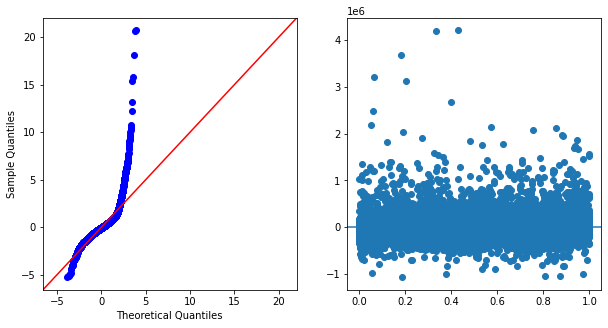

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x13f483470>,
       dtype=object))

In [110]:
model = make_ols_f(df_scale,cat_cols=['floors'])#,
#                    exclude_cols=['zipcode'])#,cat_cols=['grade','condition'])
diagnose_model(model)

In [111]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2320.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:43:47   Log-Likelihood:            -2.9463e+05
No. Observations:               21597   AIC:                         5.893e+05
Df Residuals:                   21575   BIC:                         5.895e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          5.432e+05   2403.012    226.045      0.000    5.38e+05    5.48e+05
C(floors)[T.0.010939267476541456] -5091.4604   5483.460     -0.929      0.353   -1.58e+04    5656.527
C(floors)[T.0.9374308741074004]   -1.314e+04   4403.708     -2.985      0.003   -2.18e+04   -4512.937
C(floors)[T.1.8639224807382593]    1.291e+05   1.66e+04      7.756      0.000    9.65e+04    1.62e+05
C(floors)[T.2.7904140873691183]    5.469e+04   9713.456      5.630      0.000    3.56e+04    7.37e+04
C(floors)[T.3.716905693999977]     1.863e+05   7.71e+04      2.415      0.016    3.51e+04    3.37e+05
bedrooms                          -3.627e+04   1785.649    -20.311      0.000   -3.98e+04   -3.28e+04
bathrooms                          3.534e+04   2562.525     13.790      0.000    3.03e+04    4.04e+04
sqft_living                        1.524e+05   5571.912     27.346      0.000    1.41e+05    1.63e+05
sqft_lot                           6797.8523   2008.353      3.385      0.001    2861.332    1.07e+04
waterfront                         6.381e+04   1407.335     45.344      0.000    6.11e+04    6.66e+04
condition                          1.715e+04   1547.246     11.084      0.000    1.41e+04    2.02e+04
grade                              1.178e+05   2565.258     45.918      0.000    1.13e+05    1.23e+05
sqft_above                         1.292e+04   5575.915      2.318      0.020    1995.295    2.39e+04
yr_built                          -8.162e+04   2302.283    -35.451      0.000   -8.61e+04   -7.71e+04
zipcode                           -2.691e+04   1780.870    -15.108      0.000   -3.04e+04   -2.34e+04
lat                                7.897e+04   1509.379     52.316      0.000     7.6e+04    8.19e+04
long                              -3.123e+04   1892.353    -16.503      0.000   -3.49e+04   -2.75e+04
sqft_living15                      2.624e+04   2370.236     11.069      0.000    2.16e+04    3.09e+04
sqft_lot15                        -1.104e+04   2025.264     -5.453      0.000    -1.5e+04   -7074.606
was_renovated                      9526.3015   1467.919      6.490      0.000    6649.071    1.24e+04
has_basement                      -2996.9343   2506.528     -1.196      0.232   -7909.915    1916.046
==============================================================================
Omnibus:                    17955.420   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1620151.832
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      44.859   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

### def `get_model_coeffs`

In [115]:
def highlight_sig(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_sig = s > .05
    return ['color: red' if v else '' for v in is_sig]

def get_model_coeffs(model,cmap = 'RdYlGn'):
    
    coeffs = pd.DataFrame({'coeffs':model.params,
                           'abs(coeffs)':np.abs(model.params),
                          'pvalue':np.round(model.pvalues,4)})
#     coeffs = coeffs.sort_values('abs(coeffs)',ascending=False)
    coeffs.drop('abs(coeffs)',axis=1,inplace=True)
    
    display(coeffs.style.format('${:,.2f}',subset=['coeffs']).\
            background_gradient(subset=['coeffs'],cmap=cmap).\
           apply(highlight_sig,subset=['pvalue']))#.\
#             set_caption(cmap))
    return coeffs

In [116]:
# get_model_coeffs(model);

In [117]:
# coeffs = pd.DataFrame({'coeffs':model.params,
#                        'abs(coeffs)':np.abs(model.params)})
# # coeffs.sort_values(0)
# coeffs = coeffs.sort_values('abs(coeffs)',ascending=False)

# # for cmap in [
# #             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
# #             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']:
# cmap = 'RdYlGn'
# display(coeffs.style.format('${:,.2f}').\
#         background_gradient(subset=['coeffs'],cmap=cmap).\
#         set_caption(cmap))

### Putting it all Together

### def `evaluate_model`

In [118]:
def evaluate_model(model):
    display(model.summary().tables[0])
    display(model.summary().tables[2])
    
    diagnose_model(model)
    plt.show()
    get_model_coeffs(model);

Dep. Variable:,price,R-squared:,0.693
Model:,OLS,Adj. R-squared:,0.693
Method:,Least Squares,F-statistic:,2320.
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:43:38,Log-Likelihood:,-2.9463e+05
No. Observations:,21597,AIC:,5.893e+05
Df Residuals:,21575,BIC:,5.895e+05
Df Model:,21,,
Covariance Type:,nonrobust,,


Omnibus:,17955.420,Durbin-Watson:,1.989
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1620151.832
Skew:,3.472,Prob(JB):,0.00
Kurtosis:,44.859,Cond. No.,124.


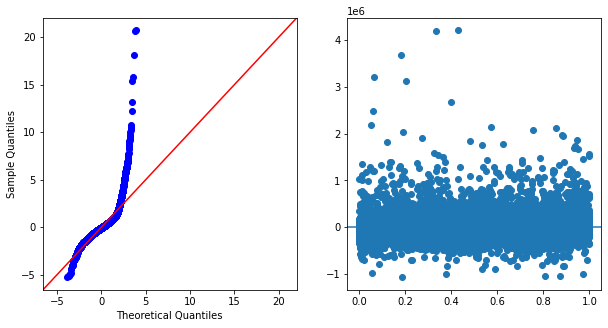

,coeffs,pvalue
Intercept,"$543,188.73",0.000000
C(floors)[T.0.010939267476541456],"$-5,091.46",0.353200
C(floors)[T.0.9374308741074004],"$-13,144.53",0.002800
C(floors)[T.1.8639224807382593],"$129,136.63",0.000000
C(floors)[T.2.7904140873691183],"$54,685.83",0.000000
C(floors)[T.3.716905693999977],"$186,264.88",0.015700
bedrooms,"$-36,269.17",0.000000
bathrooms,"$35,336.79",0.000000
sqft_living,"$152,369.02",0.000000
sqft_lot,"$6,797.85",0.000700


In [119]:
model = make_ols_f(df_scale,cat_cols=['floors'],show_summary=False)#,
evaluate_model(model)
# display(model.summary().tables[0])
# get_model_coeffs(model);
# diagnose_model(model)

In [120]:
model.params

Intercept                           543188.73
C(floors)[T.0.010939267476541456]    -5091.46
C(floors)[T.0.9374308741074004]     -13144.53
C(floors)[T.1.8639224807382593]     129136.63
C(floors)[T.2.7904140873691183]      54685.83
C(floors)[T.3.716905693999977]      186264.88
bedrooms                            -36269.17
bathrooms                            35336.79
sqft_living                         152369.02
sqft_lot                              6797.85
waterfront                           63814.60
condition                            17149.34
grade                               117790.68
sqft_above                           12924.50
yr_built                            -81617.16
zipcode                             -26905.70
lat                                  78965.24
long                                -31230.36
sqft_living15                        26237.14
sqft_lot15                          -11044.27
was_renovated                         9526.30
has_basement                      

In [91]:
# np.log(df)

### making `df_log`

In [92]:
num_cols.remove('waterfront')
# num_cols

In [56]:
df[num_cols].isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
has_basement     0
dtype: int64

In [93]:
## Logging the Data
df_log = df.copy()

for col in num_cols:
    df_log[col] = np.log(df_log[col], where= df_log[col]!=0.)

df_log = df_log.drop(columns=['lat','long'])
display(df_log.describe())

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated,has_basement
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,1.18,0.68,7.55,8.99,0.34,0.01,1.21,2.02,7.40,7.59,11.49,7.54,8.96,8.65,5.37
std,367368.14,0.28,0.39,0.42,0.90,0.35,0.08,0.18,0.15,0.43,0.01,0.00,0.33,0.81,1.82,4.46
min,78000.00,0.00,-0.69,5.91,6.25,0.00,0.00,0.00,1.10,5.91,7.55,11.49,5.99,6.48,0.00,0.00
25%,322000.00,1.10,0.56,7.27,8.53,0.00,0.00,1.10,1.95,7.08,7.58,11.49,7.31,8.54,8.52,0.00
50%,450000.00,1.10,0.81,7.55,8.94,0.41,0.00,1.10,1.95,7.35,7.59,11.49,7.52,8.94,8.92,8.41
75%,645000.00,1.39,0.92,7.84,9.28,0.69,0.00,1.39,2.08,7.70,7.60,11.49,7.77,9.22,9.21,9.01
max,7700000.00,3.50,2.08,9.51,14.32,1.25,1.00,1.61,2.56,9.15,7.61,11.49,8.73,13.68,13.68,13.66


In [94]:
## Remove outs
df_remouts = df.copy()#df[~is_outlier_z(df['price'])].copy()
for col in df_remouts.columns:
    df_remouts = df_remouts[~is_outlier_z(df_remouts[col])]
df_remouts.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,has_basement
count,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00,18862.00
mean,481214.10,3.32,2.03,1936.96,9323.14,1.47,0.00,3.43,7.51,1664.44,1970.93,98079.66,47.56,-122.23,1897.04,8567.50,0.00,0.38
std,231623.64,0.85,0.68,715.89,9827.11,0.54,0.00,0.65,0.98,660.56,29.07,53.89,0.14,0.13,573.25,7103.57,0.00,0.49
min,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,2.00,5.00,370.00,1900.00,98001.00,47.18,-122.50,460.00,651.00,0.00,0.00
25%,312500.00,3.00,1.50,1390.00,5000.00,1.00,0.00,3.00,7.00,1170.00,1952.00,98033.00,47.47,-122.33,1470.00,5000.00,0.00,0.00
50%,432000.00,3.00,2.00,1840.00,7315.00,1.00,0.00,3.00,7.00,1500.00,1974.00,98072.00,47.57,-122.25,1790.00,7400.00,0.00,0.00
75%,599285.00,4.00,2.50,2400.00,9790.25,2.00,0.00,4.00,8.00,2050.00,1996.00,98118.00,47.68,-122.14,2250.00,9520.00,0.00,1.00
max,1640000.00,6.00,4.25,4460.00,130680.00,3.00,0.00,5.00,10.00,3780.00,2015.00,98199.00,47.78,-121.80,3690.00,54886.00,0.00,1.00


In [95]:
compare_df = pd.DataFrame({'orig':df.describe().loc['mean'],
 'cleaned':df_remouts.describe().loc['mean']})

compare_df['delta'] = compare_df['cleaned'] - compare_df['orig']
compare_df

,orig,cleaned,delta
price,540296.57,481214.10,-59082.48
bedrooms,3.37,3.32,-0.05
bathrooms,2.12,2.03,-0.09
sqft_living,2080.32,1936.96,-143.37
sqft_lot,15099.41,9323.14,-5776.27
floors,1.49,1.47,-0.02
waterfront,0.01,0.00,-0.01
condition,3.41,3.43,0.02
grade,7.66,7.51,-0.15
sqft_above,1788.60,1664.44,-124.16


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



Dep. Variable:,price,R-squared:,0.813
Model:,OLS,Adj. R-squared:,0.813
Method:,Least Squares,F-statistic:,986.3
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:41:21,Log-Likelihood:,-2.4393e+05
No. Observations:,18862,AIC:,4.880e+05
Df Residuals:,18778,BIC:,4.887e+05
Df Model:,83,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
Intercept,"$-15,127,746.10",0.005400
C(zipcode)[T.98039],"$779,162.21",0.000000
C(zipcode)[T.98004],"$575,903.53",0.000000
C(zipcode)[T.98112],"$490,088.95",0.000000
C(zipcode)[T.98040],"$466,905.17",0.000000
C(zipcode)[T.98109],"$446,190.42",0.000000
C(zipcode)[T.98119],"$425,925.38",0.000000
C(zipcode)[T.98102],"$415,406.20",0.000000
C(zipcode)[T.98105],"$411,048.52",0.000000
C(zipcode)[T.98199],"$354,364.52",0.000000


Omnibus:,5536.292,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,36441.400
Skew:,1.247,Prob(JB):,0.00
Kurtosis:,9.336,Cond. No.,1.32e+16


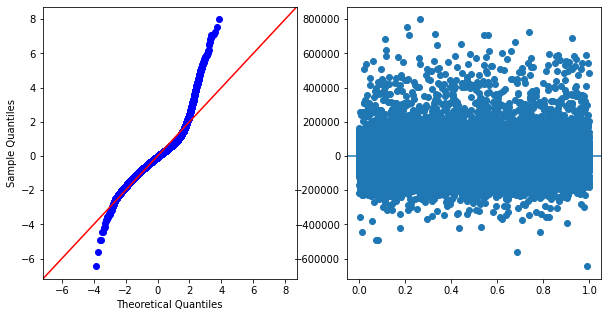

In [96]:
model = make_ols_f(df_remouts,cat_cols=['zipcode'],show_summary=False)#,
evaluate_model(model)

In [97]:
# df_remouts['log_price'] = np.log(df_remouts['price'])
# df_remouts

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



Dep. Variable:,price,R-squared:,0.813
Model:,OLS,Adj. R-squared:,0.813
Method:,Least Squares,F-statistic:,986.3
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:41:22,Log-Likelihood:,-2.4393e+05
No. Observations:,18862,AIC:,4.880e+05
Df Residuals:,18778,BIC:,4.887e+05
Df Model:,83,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
Intercept,"$-15,127,746.10",0.005400
C(zipcode)[T.98039],"$779,162.21",0.000000
C(zipcode)[T.98004],"$575,903.53",0.000000
C(zipcode)[T.98112],"$490,088.95",0.000000
C(zipcode)[T.98040],"$466,905.17",0.000000
C(zipcode)[T.98109],"$446,190.42",0.000000
C(zipcode)[T.98119],"$425,925.38",0.000000
C(zipcode)[T.98102],"$415,406.20",0.000000
C(zipcode)[T.98105],"$411,048.52",0.000000
C(zipcode)[T.98199],"$354,364.52",0.000000


Omnibus:,5536.292,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,36441.400
Skew:,1.247,Prob(JB):,0.00
Kurtosis:,9.336,Cond. No.,1.32e+16


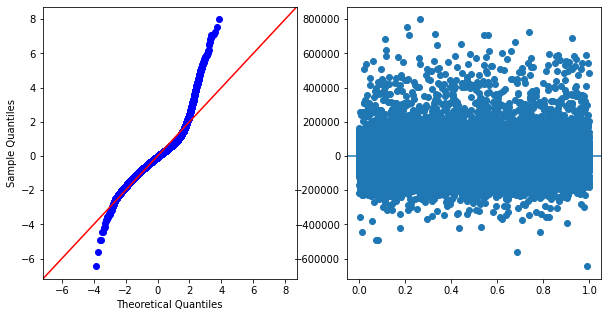

In [98]:
model = make_ols_f(df_remouts,target='price',exclude_cols=['log_price'],
                   cat_cols=['zipcode'],show_summary=False)#,
evaluate_model(model)

In [99]:
df_remouts['zipcode']

id
7129300520    98178
5631500400    98028
2487200875    98136
1954400510    98074
1321400060    98003
              ...  
263000018     98103
6600060120    98146
1523300141    98144
291310100     98027
1523300157    98144
Name: zipcode, Length: 18862, dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



Dep. Variable:,price,R-squared:,0.813
Model:,OLS,Adj. R-squared:,0.813
Method:,Least Squares,F-statistic:,1023.
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:41:22,Log-Likelihood:,-2.4393e+05
No. Observations:,18862,AIC:,4.880e+05
Df Residuals:,18781,BIC:,4.887e+05
Df Model:,80,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
Intercept,"$834,777.98",0.000000
C(zipcode)[T.98039],"$788,591.08",0.000000
C(zipcode)[T.98004],"$581,122.51",0.000000
C(zipcode)[T.98112],"$506,440.35",0.000000
C(zipcode)[T.98040],"$472,372.32",0.000000
C(zipcode)[T.98109],"$468,528.57",0.000000
C(zipcode)[T.98119],"$450,473.43",0.000000
C(zipcode)[T.98102],"$434,618.65",0.000000
C(zipcode)[T.98105],"$428,625.88",0.000000
C(zipcode)[T.98199],"$382,874.54",0.000000


Omnibus:,5538.742,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,36513.222
Skew:,1.247,Prob(JB):,0.00
Kurtosis:,9.343,Cond. No.,1.32e+16


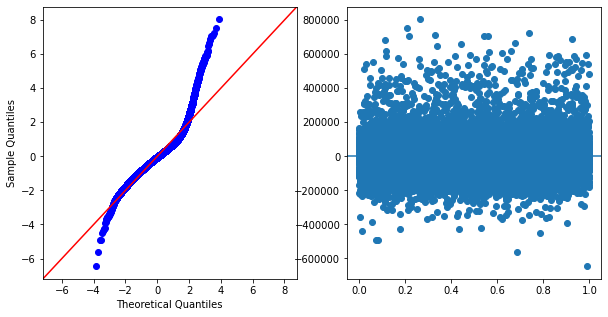

In [100]:
model = make_ols_f(df_remouts,target='price',
                   cat_cols=['zipcode'],exclude_cols=['lat','long','has_basement'],show_summary=False)#,
evaluate_model(model)

Dep. Variable:,price,R-squared:,0.800
Model:,OLS,Adj. R-squared:,0.799
Method:,Least Squares,F-statistic:,964.5
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:41:23,Log-Likelihood:,-2.9003e+05
No. Observations:,21597,AIC:,5.802e+05
Df Residuals:,21507,BIC:,5.810e+05
Df Model:,89,,
Covariance Type:,nonrobust,,


,coeffs,pvalue
C(zipcode)[T.-0.7279108686938158],"$1,246,283.51",0.000000
C(zipcode)[T.-1.381971807199419],"$720,137.28",0.000000
C(zipcode)[T.0.6362733744750134],"$541,935.20",0.000000
C(zipcode)[T.-0.7092234133079414],"$471,363.05",0.000000
C(zipcode)[T.0.44939882061626973],"$438,664.84",0.000000
C(zipcode)[T.0.5802110083173904],"$437,233.22",0.000000
C(zipcode)[T.0.767085562176134],"$425,882.61",0.000000
Intercept,"$410,596.97",0.000000
C(zipcode)[T.0.5054611867738928],"$405,979.33",0.000000
C(zipcode)[T.2.262081993046084],"$324,337.29",0.000000


Omnibus:,20326.346,Durbin-Watson:,1.985
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3497141.606
Skew:,4.050,Prob(JB):,0.00
Kurtosis:,64.811,Cond. No.,334.


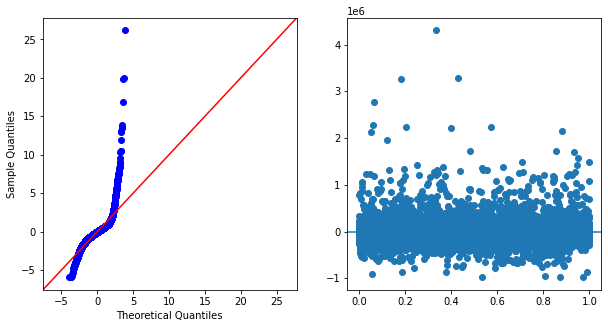

In [101]:
model = make_ols_f(df_scale,cat_cols=['zipcode','floors'],show_summary=False)#,
evaluate_model(model)

Dep. Variable:,price,R-squared:,0.813
Model:,OLS,Adj. R-squared:,0.813
Method:,Least Squares,F-statistic:,1011.
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,19:35:52,Log-Likelihood:,-2.4393e+05
No. Observations:,18862,AIC:,4.880e+05
Df Residuals:,18780,BIC:,4.887e+05
Df Model:,81,,
Covariance Type:,nonrobust,,


Omnibus:,5529.113,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,36352.988
Skew:,1.246,Prob(JB):,0.00
Kurtosis:,9.328,Cond. No.,1.32e+16


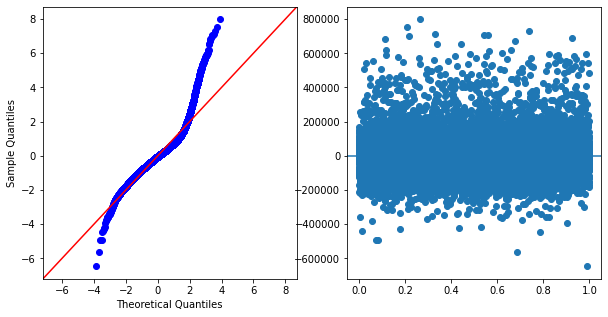

,coeffs,pvalue
Intercept,"$-13,737,753.09",0.008800
C(zipcode)[T.98002],"$25,641.78",0.006500
C(zipcode)[T.98003],"$-5,860.30",0.480200
C(zipcode)[T.98004],"$589,386.26",0.000000
C(zipcode)[T.98005],"$323,495.72",0.000000
C(zipcode)[T.98006],"$283,713.16",0.000000
C(zipcode)[T.98007],"$258,919.00",0.000000
C(zipcode)[T.98008],"$262,026.43",0.000000
C(zipcode)[T.98010],"$120,159.47",0.000000
C(zipcode)[T.98011],"$140,276.00",0.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1011.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:35:52   Log-Likelihood:            -2.4393e+05
No. Observations:               18862   AIC:                         4.880e+05
Df Residuals:                   18780   BIC:                         4.887e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.374e+07   5.24e+06     -2.620      0.009    -2.4e+07   -3.46e+06
C(zipcode)[T.98002]  2.564e+04   9423.099      2.721      0.007    7171.660    4.41e+04
C(zipcode)[T.98003] -5860.3021   8300.026     -0.706      0.480   -2.21e+04    1.04e+04
C(zipcode)[T.98004]  5.894e+05   9521.913     61.898      0.000    5.71e+05    6.08e+05
C(zipcode)[T.98005]  3.235e+05    1.1e+04     29.481      0.000    3.02e+05    3.45e+05
C(zipcode)[T.98006]  2.837e+05   9233.201     30.727      0.000    2.66e+05    3.02e+05
C(zipcode)[T.98007]  2.589e+05   1.17e+04     22.082      0.000    2.36e+05    2.82e+05
C(zipcode)[T.98008]   2.62e+05   1.06e+04     24.629      0.000    2.41e+05    2.83e+05
C(zipcode)[T.98010]  1.202e+05   1.73e+04      6.942      0.000    8.62e+04    1.54e+05
C(zipcode)[T.98011]  1.403e+05   9700.892     14.460      0.000    1.21e+05    1.59e+05
C(zipcode)[T.98014]   1.74e+05   2.06e+04      8.452      0.000    1.34e+05    2.14e+05
C(zipcode)[T.98019]  1.251e+05   1.63e+04      7.668      0.000    9.31e+04    1.57e+05
C(zipcode)[T.98022]  4.276e+04    1.5e+04      2.842      0.004    1.33e+04    7.23e+04
C(zipcode)[T.98023]  -3.46e+04   8106.830     -4.269      0.000   -5.05e+04   -1.87e+04
C(zipcode)[T.98024]  1.933e+05   2.36e+04      8.186      0.000    1.47e+05     2.4e+05
C(zipcode)[T.98027]  2.184e+05   1.24e+04     17.651      0.000    1.94e+05    2.43e+05
C(zipcode)[T.98028]  1.324e+05   8178.689     16.194      0.000    1.16e+05    1.48e+05
C(zipcode)[T.98029]  2.482e+05    1.4e+04     17.762      0.000    2.21e+05    2.76e+05
C(zipcode)[T.98030]  1.271e+04   9039.236      1.406      0.160   -5006.990    3.04e+04
C(zipcode)[T.98031]  1.747e+04   8903.834      1.962      0.050      18.791    3.49e+04
C(zipcode)[T.98032] -2222.9056   1.06e+04     -0.209      0.834    -2.3e+04    1.86e+04
C(zipcode)[T.98033]  3.515e+05   8378.191     41.948      0.000    3.35e+05    3.68e+05
C(zipcode)[T.98034]  1.954e+05   7546.123     25.893      0.000    1.81e+05     2.1e+05
C(zipcode)[T.98038]  5.869e+04   1.23e+04      4.756      0.000    3.45e+04    8.29e+04
C(zipcode)[T.98039]  7.931e+05   2.66e+04     29.865      0.000    7.41e+05    8.45e+05
C(zipcode)[T.98040]  4.779e+05   9412.066     50.777      0.000    4.59e+05    4.96e+05
C(zipcode)[T.98042]  1.964e+04   9630.655      2.039      0.041     758.887    3.85e+04
C(zipcode)[T.98045]  9.265e+04   1.02e+05      0.905      0.366   -1.08e+05    2.93e+05
C(zipcode)[T.98052]   2.59e+05   9548.149     27.122      0.000     2.4e+05    2.78e+05
C(zipcode)[T.98053]  2.594e+05   1.32e+04     19.704      0.000    2.34e+05    2.85e+05
C(zipcode)[T.98055]  5.054e+04   8799.088      5.743      0.000    3.33e+04    6.78e+04
C(zipcode)[T.98056]  1.121e+05   8353.368     13.421      0.000    9.57e+04    1.28e+05
C(z

In [151]:
model = make_ols_f(df_remouts,
                   cat_cols=['zipcode'],
                   exclude_cols=['has_basement','was_renovated','lat'],show_summary=False)#,
evaluate_model(model)
model.summary()

In [152]:
help(model.summary)

Help on method summary in module statsmodels.regression.linear_model:

summary(yname=None, xname=None, title=None, alpha=0.05) method of statsmodels.regression.linear_model.OLSResults instance
    Summarize the Regression Results.
    
    Parameters
    ----------
    yname : str, optional
        Name of endogenous (response) variable. The Default is `y`.
    xname : list[str], optional
        Names for the exogenous variables. Default is `var_##` for ## in
        the number of regressors. Must match the number of parameters
        in the model.
    title : str, optional
        Title for the top table. If not None, then this replaces the
        default title.
    alpha : float
        The significance level for the confidence intervals.
    
    Returns
    -------
    Summary
        Instance holding the summary tables and text, which can be printed
        or converted to various output formats.
    
    See Also
    --------
    statsmodels.iolib.summary.Summary : A class tha

# Validating Model

In [129]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict, KFold
from sklearn import metrics

In [137]:
train_df, test_df =train_test_split(df_remouts)
train_df.shape, test_df.shape

((14146, 18), (4716, 18))

Training R-Squared: 0.813
Test R-Squared: 0.8128


Dep. Variable:,price,R-squared:,0.813
Model:,OLS,Adj. R-squared:,0.812
Method:,Least Squares,F-statistic:,754.8
Date:,"Wed, 29 Jul 2020",Prob (F-statistic):,0.00
Time:,18:56:53,Log-Likelihood:,-1.8300e+05
No. Observations:,14146,AIC:,3.662e+05
Df Residuals:,14064,BIC:,3.668e+05
Df Model:,81,,
Covariance Type:,nonrobust,,


Omnibus:,4296.331,Durbin-Watson:,1.957
Prob(Omnibus):,0.000,Jarque-Bera (JB):,27543.837
Skew:,1.304,Prob(JB):,0.00
Kurtosis:,9.319,Cond. No.,1.32e+16


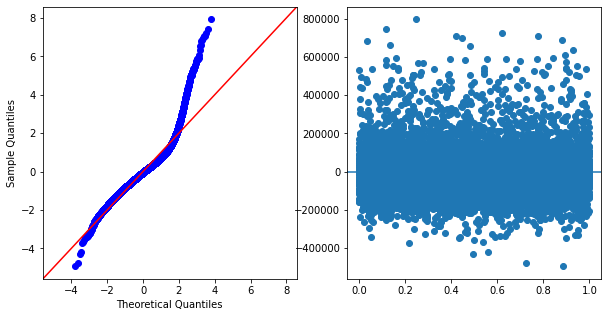

,coeffs,pvalue
Intercept,"$-16,700,331.53",0.005900
C(zipcode)[T.98002],"$22,109.02",0.048300
C(zipcode)[T.98003],"$-6,764.51",0.479600
C(zipcode)[T.98004],"$576,031.20",0.000000
C(zipcode)[T.98005],"$327,288.14",0.000000
C(zipcode)[T.98006],"$283,251.37",0.000000
C(zipcode)[T.98007],"$262,054.16",0.000000
C(zipcode)[T.98008],"$267,176.14",0.000000
C(zipcode)[T.98010],"$121,730.02",0.000000
C(zipcode)[T.98011],"$136,575.32",0.000000


In [147]:
model = make_ols_f(train_df,target='price',
                   cat_cols=['zipcode'],
                   exclude_cols=['has_basement','was_renovated','lat'],show_summary=False)#,
# pred_price = model.predict(test_df)

r2_train = metrics.r2_score(train_df['price'],model.predict(train_df))
r2_test = metrics.r2_score(test_df['price'],model.predict(test_df))
print(f"Training R-Squared: {round(r2_train,4)}")
print(f"Test R-Squared: {round(r2_test,4)}")

evaluate_model(model)


In [146]:
crossval = KFold(n_splits=10,shuffle=True)
crossval

KFold(n_splits=10, random_state=None, shuffle=True)

In [150]:
models =[]
results = {'r2_train':[],'r2_test':[]}
for train_index, test_index in crossval.split(df_remouts):
    train_df = df_remouts.loc[train_index]
    test_df = df_remouts.loc[test_index]
    print(len(train_index),len(test_index))
#     ....
    model = make_ols_f(train_df,target='price',
                   cat_cols=['zipcode'],
                   exclude_cols=['has_basement','was_renovated','lat'],show_summary=False)#,
    # pred_price = model.predict(test_df)
    models.append(model)

    r2_train = metrics.r2_score(train_df['price'],model.predict(train_df))
    r2_test = metrics.r2_score(test_df['price'],model.predict(test_df))
    results['r2_train'].append(r2_train)
    results['r2_test'].append(r2_test)
#     print(f"Training R-Squared: {round(r2_train,4)}")
#     print(f"Test R-Squared: {round(r2_test,4)}")

#     evaluate_model(model)


KeyError: "None of [Int64Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,\n               11,\n            ...\n            18851, 18852, 18854, 18855, 18856, 18857, 18858, 18859, 18860,\n            18861],\n           dtype='int64', name='id', length=16975)] are in the [index]"

### Compare Data 

In [ ]:
df_log

In [ ]:
# df_log.drop(columns=['lat','long'],axis=1,inplace=True)

In [ ]:
df_log.isna().sum()

In [ ]:
make_ols_f(df_log)#,show_summary=False)

In [ ]:
data_dict = {'scaled':df_scale,
            'raw':df,
            'logged':df_log}

In [ ]:
model_dict = {}
for name,df_ in data_dict.items():
    try:
        model_dict[name] = make_ols_f(df_,show_summary=False)
    except Exception as e:
        print(name,'\n',e)

In [ ]:
model_dict.keys()

# SKLEARN

- LinearRegression in sklearn
https://medium.com/@oluwabukunmige/implementing-linear-regression-with-sci-kit-learn-b6f87edc3150

In [ ]:
stop

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
## Instantiate a scaler
rob_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

y_col = 'price'

## Imputers
impute_qs = SimpleImputer(missing_values='?',strategy='most_frequent',add_indicator=True)
imput_nums = SimpleImputer(strategy='median',add_indicator=True)

df = pd.read_csv('kc_house_data.csv')
df.isna().sum()[df.isna().sum()>0]

In [ ]:
df.dtypes

In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
num_transformer = Pipeline([
    ('impute_qs',,
    ('impute_qs',SimpleImputer(missing_values='?',strategy='most_frequent'),
    (''))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
num_cols = df.drop(y_col,axis=1).select_dtypes('number').columns
cat_clls = 

In [ ]:
pipe = Pipeline([
    ('scaler',rob_scaler),
    ('scaler',rob_scaler),
    
])

# EDA - Mapping

In [ ]:
stop

In [ ]:
import plotly.io as pio
pio.templates

In [ ]:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent='my_app')
loc_name, (lat,lon) = geocoder.geocode('king county washington')
print(loc_name)
lat,lon

In [ ]:
import plotly.express as px
pfig = px.scatter_geo(df,lat='lat',lon='long',color='price',#scope='usa',
                      template='plotly_dark',center={'lat':lat,'lon':lon})

In [ ]:
pfig.update_layout(dict(geo={"projection":{'scale':300}}))
pfig.show(config={'scrollZoom':False})
# pfig

In [ ]:
#https://python-visualization.github.io/folium/quickstart.html
import folium
kc_map = folium.Map(location=(lat,lon),zoom_start=10)#,tiles='Stamen Toner')
# for 
kc_map

- https://stackoverflow.com/questions/49984575/is-there-a-limit-to-plotting-markers-with-folium
```python
from folium.plugins import FastMarkerCluster
my_map.add_child(FastMarkerCluster(samples[['latitude', longitude']].values.tolist()))
```

In [ ]:
def make_marker(row):

    return folium.Marker((row['lat'],row['long']),popup=row['price'])#.add_to(kc_map

markers = df.apply(add_marker,axis=1)


In [ ]:
def icon_create_function(x):
    """for FastMarkerCluster"""


In [ ]:
from folium.plugins import FastMarkerCluster
kc_map.add_child(FastMarkerCluster(df[['lat','long']]))

# EDA